<a href="https://colab.research.google.com/github/forestschao/udl/blob/main/Notebooks/Chap07/e_7_15_sample_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch     0, loss 18.531
Epoch     1, loss 9.224
Epoch     2, loss 8.572
Epoch     3, loss 7.641
Epoch     4, loss 7.226
Epoch     5, loss 6.758
Epoch     6, loss 6.487
Epoch     7, loss 6.067
Epoch     8, loss 6.226
Epoch     9, loss 5.714
Epoch    10, loss 5.207
Epoch    11, loss 5.006
Epoch    12, loss 4.505
Epoch    13, loss 4.416
Epoch    14, loss 4.235
Epoch    15, loss 4.104
Epoch    16, loss 3.851
Epoch    17, loss 3.816
Epoch    18, loss 3.707
Epoch    19, loss 3.568
Epoch    20, loss 3.327
Epoch    21, loss 3.248
Epoch    22, loss 3.196
Epoch    23, loss 3.137
Epoch    24, loss 3.104
Epoch    25, loss 3.072
Epoch    26, loss 3.044
Epoch    27, loss 3.019
Epoch    28, loss 3.001
Epoch    29, loss 2.979
Epoch    30, loss 2.947
Epoch    31, loss 2.929
Epoch    32, loss 2.917
Epoch    33, loss 2.904
Epoch    34, loss 2.889
Epoch    35, loss 2.881
Epoch    36, loss 2.866
Epoch    37, loss 2.861
Epoch    38, loss 2.844
Epoch    39, loss 2.841
Epoch    40, loss 2.812
Epoch    41, lo

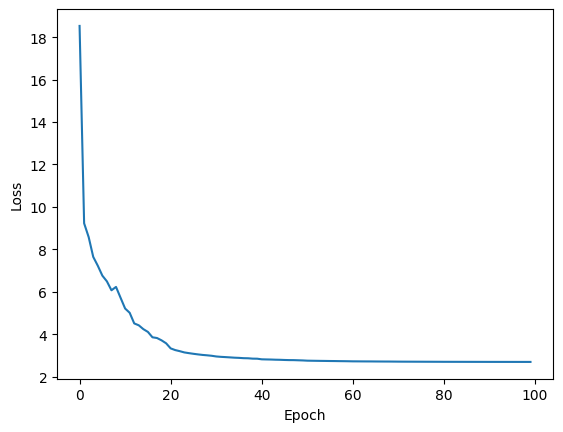

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch, torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import StepLR

# define input size, hidden layer size, output size
D_i, D_k, D_o = 10, 40, 5
# create model with two hidden layers
model = nn.Sequential(
    nn.Linear(D_i, D_k),
    nn.ReLU(),
    nn.Linear(D_k, D_k),
    nn.ReLU(),
    nn.Linear(D_k, D_o),
)

# He initialization of weights
def weights_init(layer_in):
  if isinstance(layer_in, nn.Linear):
    nn.init.kaiming_normal_(layer_in.weight)
    layer_in.bias.data.fill_(0.0)
model.apply(weights_init)

# choose least squares loss function
criterion = nn.MSELoss()
# construct SGD optimizer and initialize learning rate and momentum
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
# object that decrease learning rate by half every 10 epochs
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

# create 100 random data points and store in data loader class
x = torch.randn(100, D_i)
y = torch.randn(100, D_o)
data_loader = DataLoader(TensorDataset(x, y), batch_size=10, shuffle=True)

# loop over the dataset 100 times
epoch_loss = np.zeros(100)
for epoch in range(100):
  # loop over batches
  for i, data in enumerate(data_loader):
    # retrieve inputs and labels for this batch
    x_batch, y_batch = data
    # zero the parameter gradients
    optimizer.zero_grad()
    # forward pass
    pred = model(x_batch)
    loss = criterion(pred, y_batch)
    # backward pass
    loss.backward()
    # SGD update
    optimizer.step()
    epoch_loss[epoch] += loss.item()

  # print error
  print(f'Epoch {epoch:5d}, loss {epoch_loss[epoch]:.3f}')
  # tell scheduler to consider updating learning rate
  scheduler.step()

fig, ax = plt.subplots()
ax.plot(np.arange(100), epoch_loss)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()
